# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day2/lab-pivot-table-and-correlation/your_code/data/Employee.csv")

employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
employee.groupby("Department")["Salary"].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
pd.pivot_table(employee, values = "Salary", index = "Department", aggfunc = "mean")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
pd.pivot_table(employee, values = "Salary", index = ["Department", "Title"], aggfunc = "mean")


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
pd.pivot_table(employee, values = ["Salary", "Years"], index = "Title", columns = "Department")

Salary             Years           
Department     HR    IT Sales    HR   IT Sales
Title                                         
VP           70.0  70.0   NaN   8.0  8.0   NaN
analyst      32.5  32.5   NaN   3.0  1.5   NaN
associate     NaN  60.0  55.0   NaN  7.0   2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
def mean_for_dep(values):
    mean_salary = values.mean()
    num_employees = values.count()
    return (mean_salary, num_employees)

pd.pivot_table(employee, values = "Salary", index = ["Department", "Title"], aggfunc = mean_for_dep)


Salary
Department Title               
HR         VP         (70.0, 1)
           analyst    (32.5, 2)
IT         VP         (70.0, 1)
           analyst    (32.5, 2)
           associate  (60.0, 1)
Sales      associate  (55.0, 2)

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
def salary_by_title(values):
    median_salary = values.median()
    min_salary = values.min()
    max_salary = values.max()
    std_salary = values.std()
    return (median_salary, min_salary, max_salary, std_salary)

pd.pivot_table(employee, values = "Salary", index = ["Department", "Title"], aggfunc = salary_by_title)


Salary
Department Title                                        
HR         VP                        (70.0, 70, 70, nan)
           analyst    (32.5, 30, 35, 3.5355339059327378)
IT         VP                        (70.0, 70, 70, nan)
           analyst    (32.5, 30, 35, 3.5355339059327378)
           associate                 (60.0, 60, 60, nan)
Sales      associate                 (55.0, 55, 55, 0.0)

Analysts and VPs have matching rates amongst themselves, but sales associates make less than IT associates.

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
0

0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
stake_holders = pd.pivot_table(employee, values='Salary', index='Department', aggfunc=['sum', 'count'])

stake_holders.columns = ['Total Salary Spending', 'Number of Employees']

stake_holders

,Total Salary Spending,Number of Employees
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
experience_salary = pd.pivot_table(employee, values=['Years', 'Salary'], index=['Department', 'Title'], aggfunc={'Years': 'sum', 'Salary': 'mean'})

experience_salary.columns = ['Total Years of Work Experience', 'Mean Salary']

experience_salary

Total Years of Work Experience  Mean Salary
Department Title                                                 
HR         VP                                   70.0            8
           analyst                              32.5            6
IT         VP                                   70.0            8
           analyst                              32.5            3
           associate                            60.0            7
Sales      associate                            55.0            5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
fitbit = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day2/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv")

fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [14]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [15]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
min_very_vs_steps = fitbit["Minutes Very Active"].corr(fitbit["Steps"])

min_very_vs_steps


0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [17]:
import matplotlib.pyplot as plt

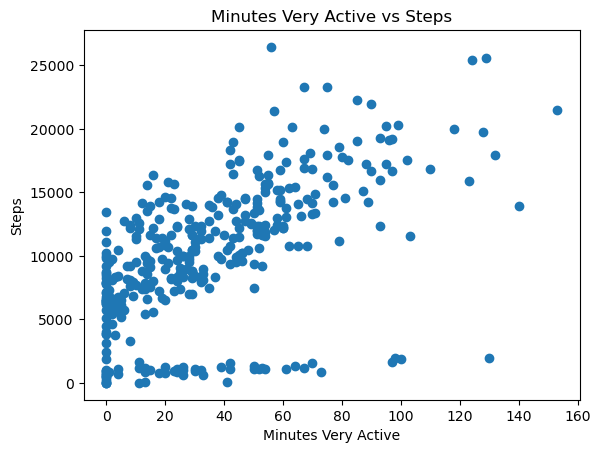

In [18]:
plt.scatter(x = fitbit["Minutes Very Active"], y = fitbit["Steps"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.title("Minutes Very Active vs Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
#There are many steps with O minutes very active.


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
min_sed_vs_steps = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

min_sed_vs_steps

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

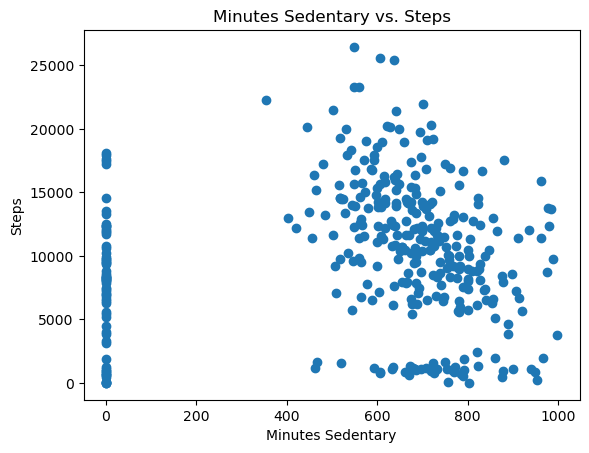

In [21]:
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.title("Minutes Sedentary vs. Steps")
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
min_sleep_vs_steps = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

min_sleep_vs_steps


0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

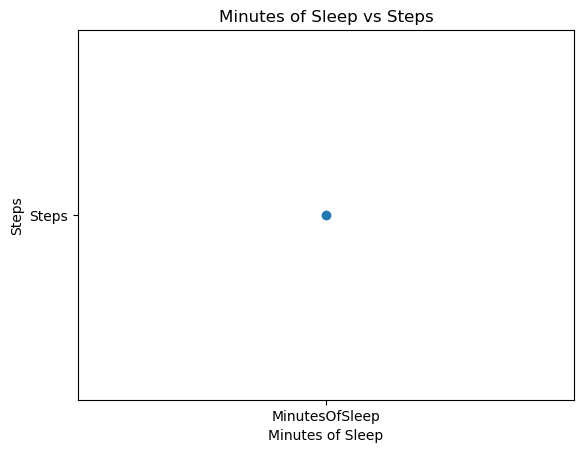

In [26]:
plt.scatter(x = ["MinutesOfSleep"], y = ["Steps"])
plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")
plt.title("Minutes of Sleep vs Steps")
plt.show()


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[columns]
cor_fit = subset.corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [28]:
correlation_with_steps = cor_fit['Steps'].sort_values(ascending=False)

correlation_with_steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [29]:
time_grades = pd.read_csv("/Users/camilaschroeder/Desktop/DATA/Week5/day2/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv")

time_grades


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

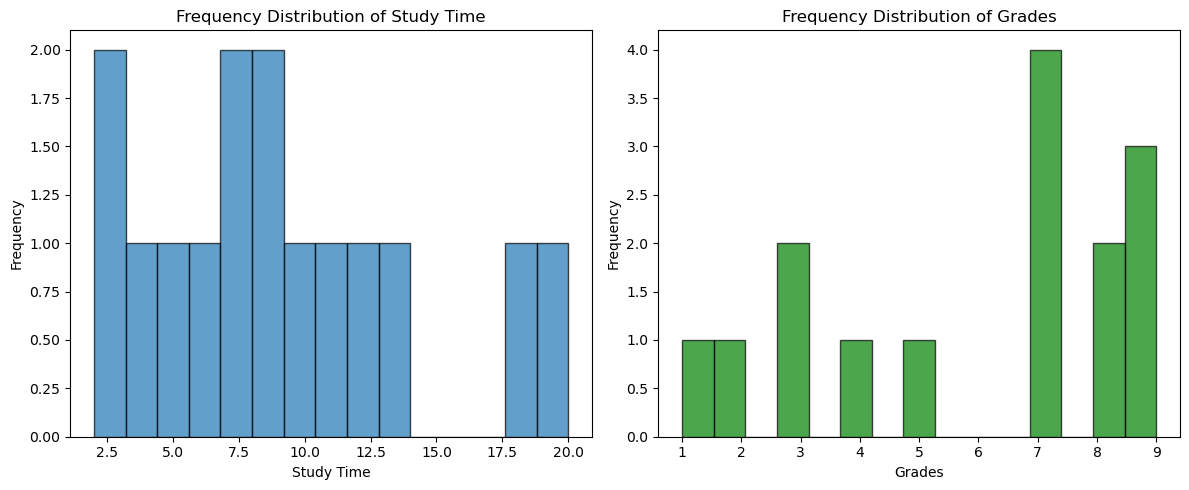

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(time_grades["Study time"], bins = 15, edgecolor = "k", alpha = 0.7)
plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Study Time")

plt.subplot(1, 2, 2)
plt.hist(time_grades["Grade"], bins = 15, edgecolor = "k", alpha = 0.7, color = "green")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Grades")

plt.tight_layout()
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [36]:
from scipy.stats import pearsonr, spearmanr

In [38]:
pearson_grades = pearsonr(time_grades["Study time"], time_grades["Grade"])

pearson_grades

PearsonRResult(statistic=0.7980456073578858, pvalue=0.0003627635256342719)

In [39]:
spearman_grades = spearmanr(time_grades["Study time"], time_grades["Grade"])

spearman_grades

SignificanceResult(statistic=0.819658753036942, pvalue=0.00018377469445788485)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

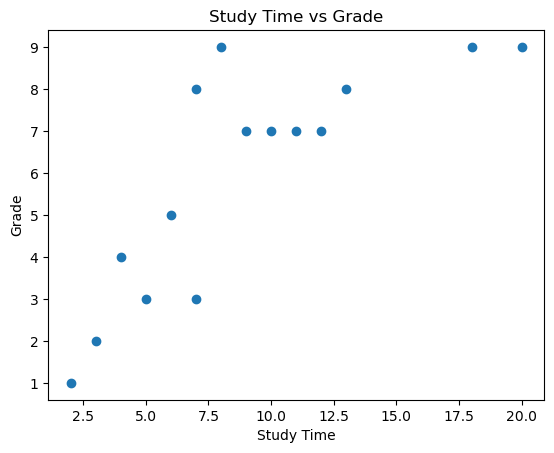

In [40]:
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.title("Study Time vs Grade")
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [41]:
#Pearson: measures strength and direction of a linear relationship between two variables.
#Spearman: measures strength and direction of anon-linear relationship between two variables, and it's less affected by outliers.
